In [1]:
import requests
from catsim.cat import generate_item_bank
from catsim.simulation import *
from catsim.initialization import *
from catsim.selection import *
from catsim.estimation import *
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc
import matplotlib.pyplot as plt
from NODO import NODO
from RED_BAYESIANA import RED_BAYESIANA
from MPCN import MPCN

URL = "http://159.223.190.216/arbol/caminoslibreria"
respuestaDelServidor = requests.get(url = URL).json()
caminos = respuestaDelServidor['caminos']

saltos = 1
tema_objetivo = 73
ponderacion_objetiva = 90

caminos_ordenados = {}
CONTRUCTOR_BN = RED_BAYESIANA(['MPCN',tema_objetivo,ponderacion_objetiva,saltos])
SRB = CONTRUCTOR_BN.obtenerSubRed()
RBM = CONTRUCTOR_BN.obtenerRedCompleta()

CAMINOS_SRB = CONTRUCTOR_BN.obtenerCaminosSubRed(tema_objetivo, saltos, caminos)
NODOS_RBMA = {}

#Inicialización de la RBMA
for nodo in RBM.nodes():
    nodo_rbm = NODO(RBM.variable(nodo).name(), 1)
    if RBM.variable(nodo).name() == str(tema_objetivo):
        nodo_rbm.poderacion = ponderacion_objetiva
        nodo_rbm.clasificacion = 3
    for tema in respuestaDelServidor['temas']:
        if RBM.variable(nodo).name() == str(tema['id']):
            nodo_rbm.dificultad = tema['dificultad']
    NODOS_RBMA[RBM.variable(nodo).name()] = nodo_rbm

INSTANCIA_MPCN = MPCN(NODOS_RBMA, CAMINOS_SRB, tema_objetivo, ponderacion_objetiva)
INSTANCIA_MPCN.ponderarNodos()
INSTANCIA_MPCN.hacerInferencias(RBM)
INSTANCIA_MPCN.promediarInferencias(SRB)
NODOS = INSTANCIA_MPCN.obtenerNodos()

In [3]:
# RBMA
for nodo in NODOS:
    print(NODOS[nodo].dificultad)

-1.97142857
-0.25714286
-0.25714286
-0.25714286
-2.05714286
-2.14285714
-2.05714286
-1.11428571
-0.34285714
-2.14285714
-2.22857143
-2.31428571
-1.2
-0.42857143
-0.42857143
0.42857143
1.2
1.8
3
-2.4
1.71428571
1.71428571
1.71428571
1.71428571
1.71428571
1.71428571
0.34285714
-1.37142857
-1.28571429
-1.37142857
-1.28571429
-0.51428571
1.02857143
1.11428571
1.71428571
2.91428571
-2.48571429
-2.48571429
0.94285714
0.94285714
0.25714286
0.25714286
0.25714286
-1.45714286
-2.14285714
-1.45714286
-0.6
-0.6
2.31428571
2.82857143
-2.57142857
-2.57142857
-2.57142857
-2.57142857
1.62857143
0.85714286
0.17142857
-1.54285714
-2.31428571
-2.57142857
-1.11428571
-0.68571429
-0.68571429
2.22857143
2.74285714
-2.65714286
-2.65714286
0.77142857
-0.77142857
0.08571429
-1.2
-1.62857143
-0.77142857
1.54285714
2.14285714
2.65714286
-2.74285714
-2.74285714
-2.14285714
1.45714286
0.68571429
-0.85714286
0
-1.71428571
-1.28571429
-1.71428571
-0.85714286
2.05714286
2.57142857
-2.82857143
-2.82857143
-0.08571429


In [4]:
initializer = RandomInitializer()
selector = MaxInfoSelector()
estimator = NumericalSearchEstimator()
stopper = MaxItemStopper(20)
#items = generate_item_bank(5, '3PL')
items = []

#RBMA
for nodo in NODOS:
    NODOS[nodo].discriminacion = 1 #
    NODOS[nodo].adivinacion = NODOS[nodo].matriz_inferencia[2] / 100
    #if NODOS[nodo].matriz_inferencia_final[2] == 0:
    #    NODOS[nodo].adivinacion = NODOS[nodo].matriz_inferencia[0] / 100
    #else:
    #    NODOS[nodo].adivinacion = NODOS[nodo].matriz_inferencia_final[0] / 100
    NODOS[nodo].asintota = 1 #

    if  NODOS[nodo].id == "1" or  NODOS[nodo].id == "2" or  NODOS[nodo].id == "14" or  NODOS[nodo].id == "20" or  NODOS[nodo].id == "13" or  NODOS[nodo].id == "17" or  NODOS[nodo].id == "40" or  NODOS[nodo].id == "51" or  NODOS[nodo].id == "52":

        print("nodo rama")
    else:
        item = [ NODOS[nodo].discriminacion, NODOS[nodo].dificultad, NODOS[nodo].adivinacion, NODOS[nodo].asintota  ]
        items.append(item)

    #item = [ NODOS[nodo].discriminacion, NODOS[nodo].dificultad, NODOS[nodo].adivinacion, NODOS[nodo].asintota  ]
    #items.append(item)

items = numpy.array(items)
#items_sinteticos = generate_item_bank(122, '3PL')
#items_sinteticos

nodo rama
nodo rama
nodo rama
nodo rama
nodo rama
nodo rama
nodo rama
nodo rama
nodo rama


In [5]:
items

array([[ 1.        , -1.97142857,  0.3584807 ,  1.        ],
       [ 1.        , -0.25714286,  0.42485041,  1.        ],
       [ 1.        , -0.25714286,  0.44918649,  1.        ],
       [ 1.        , -0.25714286,  0.34918452,  1.        ],
       [ 1.        , -2.05714286,  0.40713709,  1.        ],
       [ 1.        , -2.14285714,  0.27937201,  1.        ],
       [ 1.        , -2.05714286,  0.68787943,  1.        ],
       [ 1.        , -1.11428571,  0.27731235,  1.        ],
       [ 1.        , -0.34285714,  0.41025312,  1.        ],
       [ 1.        , -2.14285714,  0.32037155,  1.        ],
       [ 1.        , -2.22857143,  0.4735946 ,  1.        ],
       [ 1.        , -2.31428571,  0.38617785,  1.        ],
       [ 1.        , -1.2       ,  0.37651801,  1.        ],
       [ 1.        , -0.42857143,  0.42129401,  1.        ],
       [ 1.        , -0.42857143,  0.45067648,  1.        ],
       [ 1.        ,  0.42857143,  0.25229817,  1.        ],
       [ 1.        ,  1.

# INFORMACIÓN DE LOS ITEMS
* Indice 0 : Discriminación
* Indice 1 : Dificultad
* Indice 2 : Pseudo-adivinación
* Indice 3 : Asíntota superior
##### Al usar el modelo logistico 3PL: el índice 3 se asigna en 1.0
##### Al usar el modelo logistico 2PL: el indice 3 se asigna en 1.0 y el índice 2 se asigna a 0.0

In [6]:
items

array([[ 1.        , -1.97142857,  0.3584807 ,  1.        ],
       [ 1.        , -0.25714286,  0.42485041,  1.        ],
       [ 1.        , -0.25714286,  0.44918649,  1.        ],
       [ 1.        , -0.25714286,  0.34918452,  1.        ],
       [ 1.        , -2.05714286,  0.40713709,  1.        ],
       [ 1.        , -2.14285714,  0.27937201,  1.        ],
       [ 1.        , -2.05714286,  0.68787943,  1.        ],
       [ 1.        , -1.11428571,  0.27731235,  1.        ],
       [ 1.        , -0.34285714,  0.41025312,  1.        ],
       [ 1.        , -2.14285714,  0.32037155,  1.        ],
       [ 1.        , -2.22857143,  0.4735946 ,  1.        ],
       [ 1.        , -2.31428571,  0.38617785,  1.        ],
       [ 1.        , -1.2       ,  0.37651801,  1.        ],
       [ 1.        , -0.42857143,  0.42129401,  1.        ],
       [ 1.        , -0.42857143,  0.45067648,  1.        ],
       [ 1.        ,  0.42857143,  0.25229817,  1.        ],
       [ 1.        ,  1.

In [65]:
i = 0
for nodo in NODOS:
    if NODOS[nodo].id == '26' or NODOS[nodo].id == '161' or NODOS[nodo].id == '25' or NODOS[nodo].id == '24':
        print(items[i])
        print( "ID NODO " + str(NODOS[nodo].id) )
        print( "INDICE " + str(i) )
    i = i + 1

#responses = [False, True, True, True, True]
#administered_items = [59, 66, 106, 105, 160] # Esto significa que los temas de la lista de items
responses = [False]
administered_items = [60] # Esto significa que los temas de la lista de items
est_theta = initializer.initialize()
print('Competencia inicial del alumno:', est_theta)
new_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
print('Dominio estimado dados los elementos respondidos:', new_theta)
_stop = stopper.stop(administered_items=items[administered_items], theta=est_theta)
print('El examen debería terminar?:', _stop)
item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)
print('Siguiente tema a ser evaluado:', item_index)

i = 0
for nodo in NODOS:
    if i == 7:
        print(items[i])
        print( "ID NODO " + str(NODOS[nodo].id) )
        print( "INDICE " + str(i) )
    i = i + 1

s = Simulator(items, 10, RandomInitializer(), MaxInfoSelector(), NumericalSearchEstimator(), MaxItemStopper(10))
s.simulate(verbose=True)
print('Bias:', s.bias)
print('Mean squared error:', s.mse)
print('Root mean squared error:', s.rmse)
examinee_index = 0
print('Accessing examinee', examinee_index, 'results...')
print('    True proficiency:', s.examinees[examinee_index])
print('    Items administered:', s.administered_items[examinee_index])
print('    Responses:', s.response_vectors[examinee_index])
print('    Proficiency estimation during each step of the test:', s.estimations[examinee_index])

Competencia inicial del alumno: -1.1732870372226256
Dominio estimado dados los elementos respondidos: -2.043786373611313
El examen debería terminar?: False
Siguiente tema a ser evaluado: 7


[ 1.         -1.11428571  0.27731235  1.        ]
ID NODO 169
INDICE 7


100%|██████████| 10/10 [00:00<00:00, 98.01it/s]


Starting simulation: Random Initializer Maximum Information Selector Numerical Search Estimator (bounded) Maximum Item Number Initializer 113 items
Simulation took 0.10202860832214355 seconds
Bias: -0.23986356547513116
Mean squared error: 0.7242319816491931
Root mean squared error: 0.8510182028894524
Accessing examinee 0 results...
    True proficiency: 1.5612254541796875
    Items administered: [55, 60, 47, 109, 42, 38, 73, 15, 67, 99]
    Responses: [False, True, True, True, True, True, False, True, True, True]
    Proficiency estimation during each step of the test: [1.8722617455605821, -0.5210119822197088, -0.4095424404057455, 0.2118032586615063, 0.6780422514640508, 1.077791212730375, 1.520650203671405, 1.0151914128149921, 1.2241916357681797, 1.4103542950994972, 1.6177615555493896]


In [70]:
len(s.administered_items[0])

10

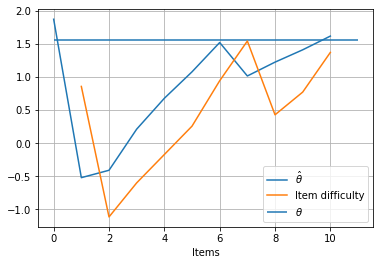

In [71]:
catplot.test_progress(simulator=s,index=0)

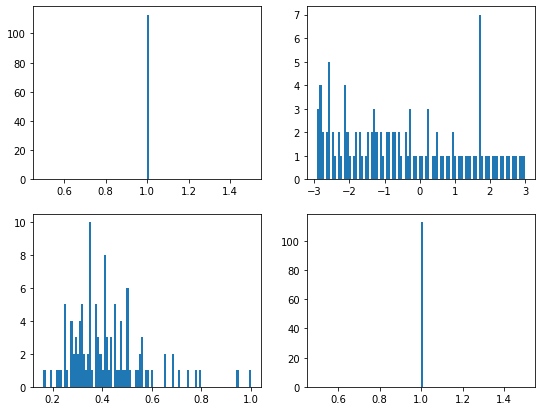

In [72]:
catplot.param_dist(items, figsize=(9,7))

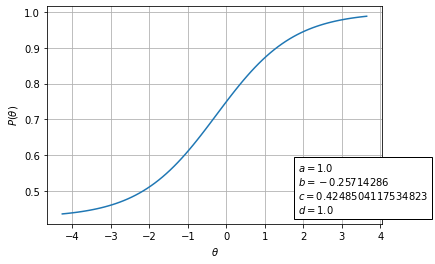

In [73]:
a, b, c, d = items[1]
catplot.item_curve(a,b,c,d)

In [75]:
NODOS[0]

KeyError: 0

In [ ]:
'''s = Simulator(items, 10, RandomInitializer(), MaxInfoSelector(), NumericalSearchEstimator(), MaxItemStopper(10))
s.simulate(verbose=True)
print('Bias:', s.bias)
print('Mean squared error:', s.mse)
print('Root mean squared error:', s.rmse)
examinee_index = 0
print('Accessing examinee', examinee_index, 'results...')
print('    True proficiency:', s.examinees[examinee_index])
print('    Items administered:', s.administered_items[examinee_index])
print('    Responses:', s.response_vectors[examinee_index])
print('    Proficiency estimation during each step of the test:', s.estimations[examinee_index])
len(s.administered_items[0])
catplot.test_progress(simulator=s,index=0)
catplot.param_dist(items, figsize=(9,7))
a, b, c, d = items[1]
catplot.item_curve(a,b,c,d)'''
